<font size="10">Question to Answer
    
<font size="5">How have population sizes changed in each city from 2019-2021?
    

<font size="7">Approach

Data Source: Import Census dependency and use personal Census.gov API key to get the population data from each city for the years 2019, 2020 and 2021.
    
Frame Data: Combine and clean data into one DataFrame
    
Collect Percentages: Use .iloc code on the new DataFrame to calculate growth percentages for each city and then create a new DataFrame with the data (for 2019-2020 and 2020-2021).  As well as use .iloc code on the new DataFrame to calculate growth percentages for each city and create a new DataFrame (for 2019-2021).

Analyze Data: Create a visualization to show population growth for 2019-2020 and 2020-2021 as well as a visualization for 2019-2021.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from census import Census
from config import cs_api_key
import numpy as np

In [2]:
# Set API Key
c = Census(cs_api_key, year=2019)
c1 = Census(cs_api_key, year=2020)
c2 = Census(cs_api_key, year=2021)

In [3]:
# Load in Census Data.  
# "B01003_001E" is the Total Population Estimate for the annual American Community Survey
# "Urban Area" codes are for each city we are analyzing
census_data_19 = c.acs.get(("NAME", "B01003_001E"), {"for": "urban area:04384, 16264, 23527, 56116, 63217, 78904"})
census_data_20 = c1.acs.get(("NAME", "B01003_001E"), {"for": "urban area:04384, 16264, 23527, 56116, 63217, 78904"})
census_data_21 = c2.acs.get(("NAME", "B01003_001E"), {"for": "urban area:04384, 16264, 23527, 56116, 63217, 78904"})

In [4]:
# Create DataFrames
population_19 = pd.DataFrame(census_data_19)
population_20 = pd.DataFrame(census_data_20)
population_21 = pd.DataFrame(census_data_21)

In [5]:
# Append 2020 and 2021 Data into 2019 DataFrame
population_19 = population_19.append(population_20)
population_19 = population_19.append(population_21)
population_19

/var/folders/qb/7shvsxt10k32_mgwv3kxqph40000gn/T/ipykernel_36269/1709078564.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  population_19 = population_19.append(population_20)
/var/folders/qb/7shvsxt10k32_mgwv3kxqph40000gn/T/ipykernel_36269/1709078564.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  population_19 = population_19.append(population_21)


,NAME,B01003_001E,urban area
0,"San Francisco--Oakland, CA Urbanized Area (2010)",3534282.0,78904
1,"New York--Newark, NY--NJ--CT Urbanized Area (2...",18750806.0,63217
2,"Memphis, TN--MS--AR Urbanized Area (2010)",1076417.0,56116
3,"Chicago, IL--IN Urbanized Area (2010)",8645134.0,16264
4,"Denver--Aurora, CO Urbanized Area (2010)",2666707.0,23527
5,"Austin, TX Urbanized Area (2010)",1633264.0,04384
0,"Chicago, IL--IN Urbanized Area (2010)",8609757.0,16264
1,"New York--Newark, NY--NJ--CT Urbanized Area (2...",18714184.0,63217
2,"San Francisco--Oakland, CA Urbanized Area (2010)",3532003.0,78904
3,"Austin, TX Urbanized Area (2010)",1654166.0,04384


In [6]:
# Change City Names, rename columns and drop 'urban area' column
population_19 = population_19.rename( 
    columns = {
        "NAME": "City", 
        "B01003_001E": "Population",
    }
)

population_19 = population_19.drop(columns=['urban area'])
population_19

,City,Population
0,"San Francisco--Oakland, CA Urbanized Area (2010)",3534282.0
1,"New York--Newark, NY--NJ--CT Urbanized Area (2...",18750806.0
2,"Memphis, TN--MS--AR Urbanized Area (2010)",1076417.0
3,"Chicago, IL--IN Urbanized Area (2010)",8645134.0
4,"Denver--Aurora, CO Urbanized Area (2010)",2666707.0
5,"Austin, TX Urbanized Area (2010)",1633264.0
0,"Chicago, IL--IN Urbanized Area (2010)",8609757.0
1,"New York--Newark, NY--NJ--CT Urbanized Area (2...",18714184.0
2,"San Francisco--Oakland, CA Urbanized Area (2010)",3532003.0
3,"Austin, TX Urbanized Area (2010)",1654166.0


In [7]:
# Add Years to column and sort values
years = ['2019', '2019', '2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020', '2020', '2020', '2021', '2021', '2021', '2021', 
         '2021', '2021']
population_19['Year'] = years
population_19

,City,Population,Year
0,"San Francisco--Oakland, CA Urbanized Area (2010)",3534282.0,2019
1,"New York--Newark, NY--NJ--CT Urbanized Area (2...",18750806.0,2019
2,"Memphis, TN--MS--AR Urbanized Area (2010)",1076417.0,2019
3,"Chicago, IL--IN Urbanized Area (2010)",8645134.0,2019
4,"Denver--Aurora, CO Urbanized Area (2010)",2666707.0,2019
5,"Austin, TX Urbanized Area (2010)",1633264.0,2019
0,"Chicago, IL--IN Urbanized Area (2010)",8609757.0,2020
1,"New York--Newark, NY--NJ--CT Urbanized Area (2...",18714184.0,2020
2,"San Francisco--Oakland, CA Urbanized Area (2010)",3532003.0,2020
3,"Austin, TX Urbanized Area (2010)",1654166.0,2020


In [8]:
# Calculate growth percentages and round for Years 2019-2020 and 2020-2021
# San Francisco
sf_growth_percentage_2020 = 100 * (population_19.iloc[8,1] - population_19.iloc[0,1]) / population_19.iloc[8,1]
sf_growth_percentage_2021 = 100 * (population_19.iloc[17,1] - population_19.iloc[8,1]) / population_19.iloc[17,1]
sf_growth_percentage_2020 = round(sf_growth_percentage_2020, 2)
sf_growth_percentage_2021 = round(sf_growth_percentage_2021, 2)
# New York City
nyc_growth_percentage_2020 = 100 * (population_19.iloc[7,1] - population_19.iloc[1,1]) / population_19.iloc[7,1]
nyc_growth_percentage_2021 = 100 * (population_19.iloc[16,1] - population_19.iloc[7,1]) / population_19.iloc[16,1]
nyc_growth_percentage_2020 = round(nyc_growth_percentage_2020, 2)
nyc_growth_percentage_2021 = round(nyc_growth_percentage_2021, 2)
# Memphis
mem_growth_percentage_2020 = 100 * (population_19.iloc[11,1] - population_19.iloc[2,1]) / population_19.iloc[11,1]
mem_growth_percentage_2021 = 100 * (population_19.iloc[15,1] - population_19.iloc[11,1]) / population_19.iloc[15,1]
mem_growth_percentage_2020 = round(mem_growth_percentage_2020, 2)
mem_growth_percentage_2021 = round(mem_growth_percentage_2021, 2)
# Chicago
chi_growth_percentage_2020 = 100 * (population_19.iloc[6,1] - population_19.iloc[3,1]) / population_19.iloc[6,1]
chi_growth_percentage_2021 = 100 * (population_19.iloc[13,1] - population_19.iloc[6,1]) / population_19.iloc[13,1]
chi_growth_percentage_2020 = round(chi_growth_percentage_2020, 2)
chi_growth_percentage_2021 = round(chi_growth_percentage_2021, 2)
# Denver
den_growth_percentage_2020 = 100 * (population_19.iloc[10,1] - population_19.iloc[4,1]) / population_19.iloc[10,1]
den_growth_percentage_2021 = 100 * (population_19.iloc[14,1] - population_19.iloc[10,1]) / population_19.iloc[14,1]
den_growth_percentage_2020 = round(den_growth_percentage_2020, 2)
den_growth_percentage_2021 = round(den_growth_percentage_2021, 2)
# Austin
atx_growth_percentage_2020 = 100 * (population_19.iloc[9,1] - population_19.iloc[5,1]) / population_19.iloc[9,1]
atx_growth_percentage_2021 = 100 * (population_19.iloc[12,1] - population_19.iloc[9,1]) / population_19.iloc[12,1]
atx_growth_percentage_2020 = round(atx_growth_percentage_2020, 2)
atx_growth_percentage_2021 = round(atx_growth_percentage_2021, 2)
atx_growth_percentage_2021

-0.85

In [9]:
# Create new DataFrame with percentages
percentages = ({ 
    'City': ["San Francisco", "New York", "Memphis", "Chicago", "Denver", "Austin"],
    '2019-2020 Population Growth (%)': [sf_growth_percentage_2020, nyc_growth_percentage_2020, mem_growth_percentage_2020, chi_growth_percentage_2020, 
                          den_growth_percentage_2020, atx_growth_percentage_2020],
    '2020-2021 Population Growth (%)': [sf_growth_percentage_2021, nyc_growth_percentage_2021, mem_growth_percentage_2021, chi_growth_percentage_2021, 
                          den_growth_percentage_2021, atx_growth_percentage_2021]
})
percentages_df = pd.DataFrame(percentages)
percentages_df

,City,2019-2020 Population Growth (%),2020-2021 Population Growth (%)
0,San Francisco,-0.06,0.24
1,New York,-0.20,3.74
2,Memphis,0.17,-0.86
3,Chicago,-0.41,1.36
4,Denver,0.93,-0.17
5,Austin,1.26,-0.85


In [10]:
# Sort values by City Name
percentages_df = percentages_df.sort_values('City')
percentages_df

,City,2019-2020 Population Growth (%),2020-2021 Population Growth (%)
5,Austin,1.26,-0.85
3,Chicago,-0.41,1.36
4,Denver,0.93,-0.17
2,Memphis,0.17,-0.86
1,New York,-0.20,3.74
0,San Francisco,-0.06,0.24


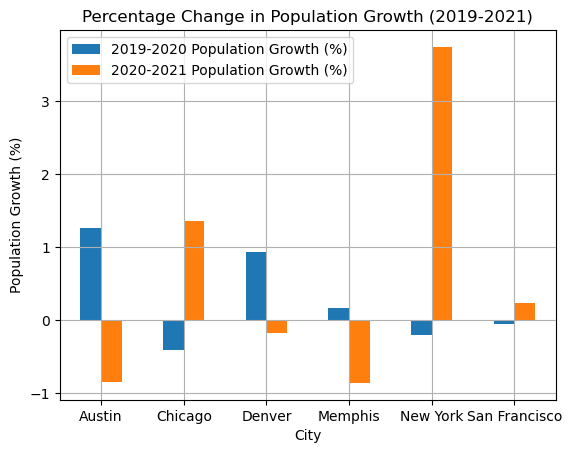

In [16]:
# Plot a bar chart visualizing each city's growth for the years 2019-2020 and 2020-2021
ax = percentages_df.plot(kind='bar', x='City', rot=0)
plt.xlabel('City')
plt.ylabel('Population Growth (%)')
plt.title('Percentage Change in Population Growth (2019-2021)')
plt.grid()
# Save Chart as an Image
plt.savefig("output_data/CityPopulationGrowth.png")
plt.show()

In [12]:
# Calculate growth percentages and round for Total Growth from 2019-2021
# San Francisco
sf_growth_percentage_total = 100 * (population_19.iloc[17,1] - population_19.iloc[0,1]) / population_19.iloc[17,1]
sf_growth_percentage_total = round(sf_growth_percentage_total, 2)
# New York City
nyc_growth_percentage_total = 100 * (population_19.iloc[16,1] - population_19.iloc[1,1]) / population_19.iloc[16,1]
nyc_growth_percentage_total = round(nyc_growth_percentage_total, 2)
# Memphis
mem_growth_percentage_total = 100 * (population_19.iloc[15,1] - population_19.iloc[2,1]) / population_19.iloc[15,1]
mem_growth_percentage_total = round(mem_growth_percentage_total, 2)
# Chicago
chi_growth_percentage_total = 100 * (population_19.iloc[13,1] - population_19.iloc[3,1]) / population_19.iloc[13,1]
chi_growth_percentage_total = round(chi_growth_percentage_total, 2)
# Denver
den_growth_percentage_total = 100 * (population_19.iloc[14,1] - population_19.iloc[4,1]) / population_19.iloc[14,1]
den_growth_percentage_total = round(den_growth_percentage_total, 2)
# Austin
atx_growth_percentage_total = 100 * (population_19.iloc[12,1] - population_19.iloc[5,1]) / population_19.iloc[12,1]
atx_growth_percentage_total = round(atx_growth_percentage_total, 2)

In [13]:
# Create full Population Growth DataFrame with percentages and sort values by city name
percentages_full = ({ 
    'City': ["San Francisco", "New York", "Memphis", "Chicago", "Denver", "Austin"],
    '2019-2021 Population Growth (%)': [sf_growth_percentage_total, nyc_growth_percentage_total, mem_growth_percentage_total, chi_growth_percentage_total, 
                          den_growth_percentage_total, atx_growth_percentage_total],
})
percentages_full_df = pd.DataFrame(percentages_full)
percentages_full_df

,City,2019-2021 Population Growth (%)
0,San Francisco,0.17
1,New York,3.55
2,Memphis,-0.69
3,Chicago,0.96
4,Denver,0.76
5,Austin,0.42


In [14]:
# Sort values by City Name and set City as index
percentages_full_df = percentages_full_df.sort_values('City')
percentages_full_df

,City,2019-2021 Population Growth (%)
5,Austin,0.42
3,Chicago,0.96
4,Denver,0.76
2,Memphis,-0.69
1,New York,3.55
0,San Francisco,0.17


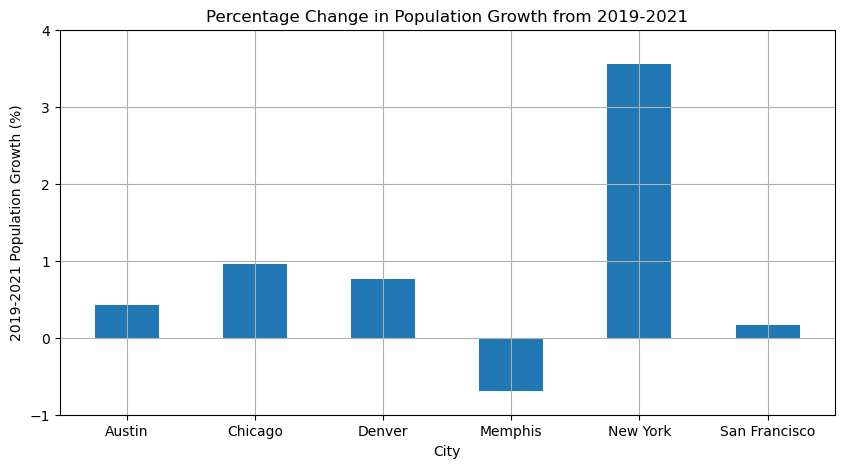

In [15]:
# Plot full population growth for each city from 2019-2021

x_values = percentages_full_df['City']
y_values = percentages_full_df['2019-2021 Population Growth (%)']

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x_values, y_values, width=0.5)

ax.set_xlabel("City")
ax.set_ylabel("2019-2021 Population Growth (%)")
ax.set_title("Percentage Change in Population Growth from 2019-2021")
ax.set_ylim(-1, 4)
ax.grid()

# Save Figure
plt.savefig("output_data/Full_Popluation_Growth.png")

plt.show()